<a href="https://colab.research.google.com/github/moni8/pcosDetection/blob/main/ML_PCOS_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import files
uploaded = files.upload()

from csv import reader

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC  #importing all required libraries

Saving PCOS_data.csv to PCOS_data.csv


# Data Preparation & Exploration

In [ ]:
df = pd.read_csv("PCOS_data.csv")  #Reading the data as a Dataframe

In [ ]:
df.describe() #To view data information

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.327172,31.430684,59.637153,156.484835,24.319360,13.802218,73.247689,19.243993,11.160037,2.560074,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,0.469615,5.411006,11.028287,6.033545,4.050810,1.840812,4.430285,1.688629,0.866904,0.901950,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,8.500000,2.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,52.000000,152.000000,21.707923,13.000000,72.000000,18.000000,10.500000,2.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,11.000000,2.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,1.000000,35.000000,65.000000,160.000000,26.638918,15.000000,74.000000,20.000000,11.700000,4.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,1.000000,48.000000,108.000000,180.000000,38.900714,18.000000,82.000000,28.000000,14.800000,5.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [ ]:
df.isna().sum() #N/A value presence found

PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                1
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           1
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

In [ ]:
df.isnull().sum() #NULL Value presence found

PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                1
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           1
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

In [ ]:
df = df.dropna() #Dropping N/A values

In [ ]:
df #Checking for Dataframe validity

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.000,19.304017,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.500,24.921163,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.000,25.270891,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.000,29.674945,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.000,20.060954,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,35,50.0,164.592,18.456637,17,72,16,11.00,2,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,0,30,63.2,158.000,25.316456,15,72,18,10.80,2,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,0,36,54.0,152.000,23.372576,13,74,20,10.80,2,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,0,27,50.0,150.000,22.222222,15,74,20,12.00,4,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


In [ ]:
for column in df:
    columnSeriesObj = df[column]
    df[column] = pd.to_numeric(df[column], errors='coerce')  #Conversion of Attributes to Numeric

In [ ]:
df.info() #Check Attribute Types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              538 non-null    int64  
 1    Age (yrs)              538 non-null    int64  
 2   Weight (Kg)             538 non-null    float64
 3   Height(Cm)              538 non-null    float64
 4   BMI                     538 non-null    float64
 5   Blood Group             538 non-null    int64  
 6   Pulse rate(bpm)         538 non-null    int64  
 7   RR (breaths/min)        538 non-null    int64  
 8   Hb(g/dl)                538 non-null    float64
 9   Cycle(R/I)              538 non-null    int64  
 10  Cycle length(days)      538 non-null    int64  
 11  Marraige Status (Yrs)   538 non-null    float64
 12  Pregnant(Y/N)           538 non-null    int64  
 13  No. of aborptions       538 non-null    int64  
 14    I   beta-HCG(mIU/mL)  538 non-null    fl

In [ ]:
num_col = [' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ','RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)','No. of aborptions', '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']
num_col1 = [' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI']  #Continuous Features

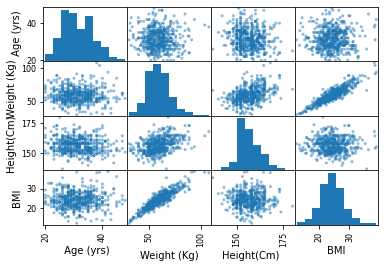

In [ ]:
pd.plotting.scatter_matrix(df[num_col1])
plt.savefig("num_col1.png") #Scatter Plot of Continuous Features

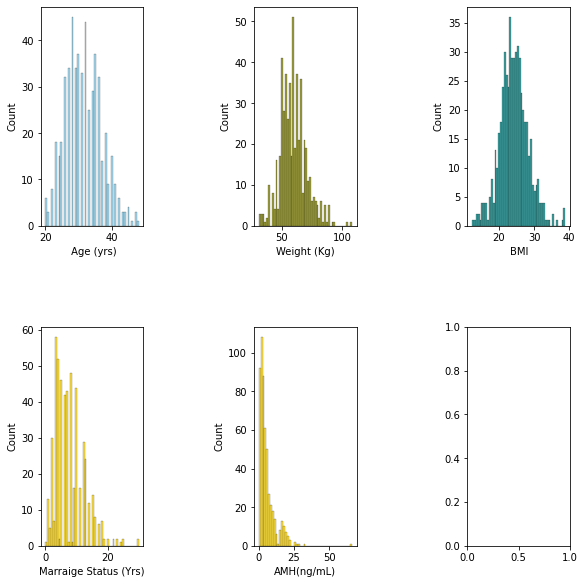

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(10, 10))
fig.tight_layout(pad=8)
binSize = 50
sns.histplot(data=df, x=" Age (yrs)", color="skyblue", ax=axes[0, 0], bins=binSize)
sns.histplot(data=df, x="Weight (Kg)", color="olive", ax=axes[0, 1], bins=binSize)
sns.histplot(data=df, x="BMI", color="teal", ax=axes[0, 2], bins=binSize)
sns.histplot(data=df, x="Marraige Status (Yrs)", color="gold", ax=axes[1, 0], bins=binSize)
sns.histplot(data=df, x="AMH(ng/mL)", color="gold", ax=axes[1, 1], bins=binSize)
plt.savefig("continuous_features_histogram.png")  #Histogram for Continuous Features

In [ ]:
cat_col = ['Pregnant(Y/N)','Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)']
cat_col1 = ['Pregnant(Y/N)','hair growth(Y/N)', 'Reg.Exercise(Y/N)'] #Categorical Features

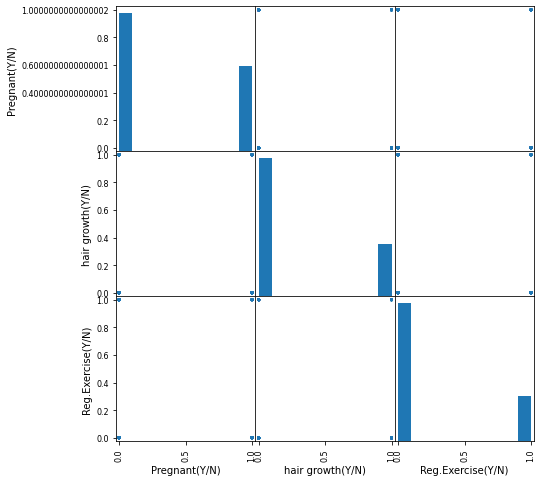

In [ ]:
pd.plotting.scatter_matrix(df[cat_col1], figsize=(7.5,8))
plt.savefig("cat_col1.png") #Scatter Plot for Categorical Features

In [ ]:
df.corr() #Viewing Correlation

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
PCOS (Y/N),1.000000,-0.171349,0.209969,0.065465,0.199317,0.033701,0.092699,0.038641,0.087809,0.401837,...,0.290335,0.380985,0.071979,0.007923,0.033562,0.601208,0.650929,1.299969e-01,0.094528,0.107639
Age (yrs),-0.171349,1.000000,-0.030984,-0.119885,0.017561,-0.011836,0.045634,0.088748,-0.023686,-0.085473,...,-0.034990,-0.034234,-0.025916,0.072437,0.066779,-0.113809,-0.158386,-2.096918e-02,-0.082677,-0.100115
Weight (Kg),0.209969,-0.030984,1.000000,0.419808,0.902321,0.071354,0.020101,0.045339,0.009363,0.201575,...,0.064817,0.162872,-0.065109,0.028122,0.129210,0.171896,0.124669,-2.351731e-02,-0.075220,-0.009452
Height(Cm),0.065465,-0.119885,0.419808,1.000000,-0.006264,0.039409,-0.073608,-0.030492,0.025962,-0.021780,...,0.064912,0.032853,0.015610,-0.068720,0.009094,0.102968,0.075560,-2.741536e-02,0.058357,-0.056273
BMI,0.199317,0.017561,0.902321,-0.006264,1.000000,0.059444,0.050479,0.064575,0.002309,0.236170,...,0.044710,0.161228,-0.076368,0.068847,0.136142,0.143641,0.105599,-1.228819e-02,-0.113855,0.012362
Blood Group,0.033701,-0.011836,0.071354,0.039409,0.059444,1.000000,0.047865,-0.022707,-0.001652,0.123310,...,0.040382,-0.034770,0.067994,0.031264,0.051543,0.058719,0.014200,-3.759934e-02,-0.017517,-0.015257
Pulse rate(bpm),0.092699,0.045634,0.020101,-0.073608,0.050479,0.047865,1.000000,0.305676,-0.052796,0.103416,...,-0.004395,0.059712,-0.039055,-0.025021,0.007676,0.041534,0.049168,-4.867105e-02,-0.034141,-0.040456
RR (breaths/min),0.038641,0.088748,0.045339,-0.030492,0.064575,-0.022707,0.305676,1.000000,-0.038693,0.012769,...,0.032356,0.137533,-0.054183,0.013981,0.057322,0.069848,0.012856,-2.919643e-02,-0.020780,-0.066551
Hb(g/dl),0.087809,-0.023686,0.009363,0.025962,0.002309,-0.001652,-0.052796,-0.038693,1.000000,0.040443,...,0.051089,0.077310,0.011980,0.053583,0.000475,0.062314,0.073459,3.087933e-02,0.023528,-0.063592
Cycle(R/I),0.401837,-0.085473,0.201575,-0.021780,0.236170,0.123310,0.103416,0.012769,0.040443,1.000000,...,0.129362,0.208929,-0.006537,0.051787,0.082659,0.293743,0.253369,3.437944e-02,0.015318,0.039612


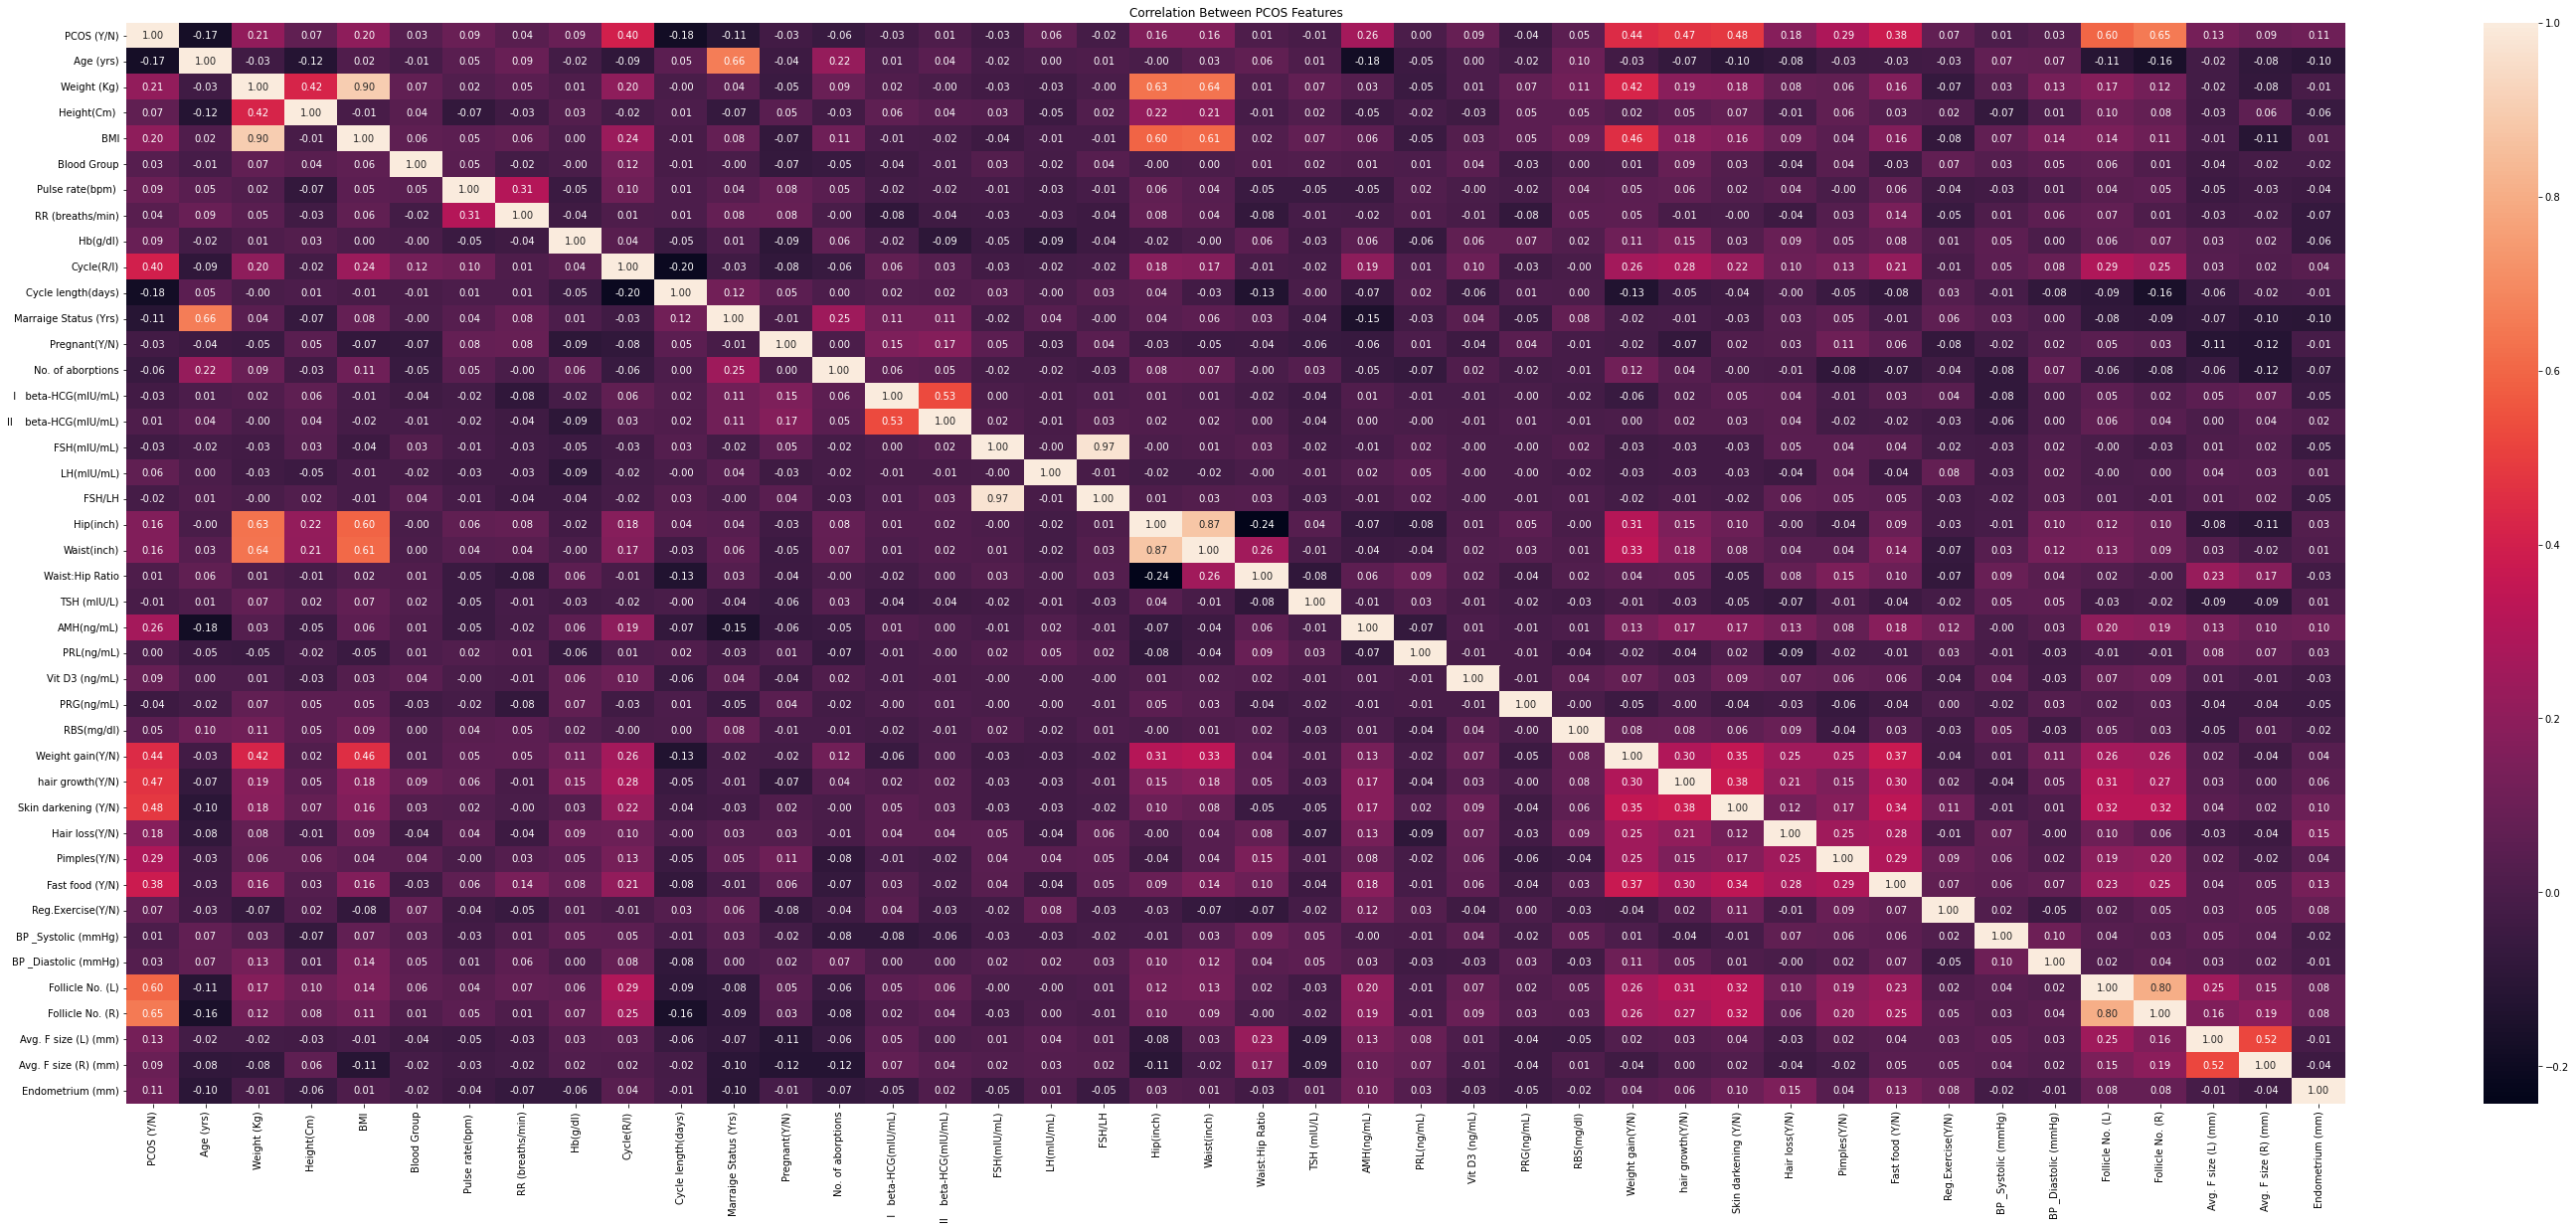

In [ ]:
corr_matrix= df.corr()
plt.subplots(figsize=(50,20))
sns.heatmap(corr_matrix, annot = True, fmt = ".2f");
plt.title("Correlation Between PCOS Features")
plt.savefig("pcos_correlation.png") #Plotting Correlation Matrix with Heatmap

In [ ]:
X = df.iloc[:,1:41].values #Descriptive Features
Y = df.iloc[:,0].values #Target Feature
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25 , random_state = 42) #25% Test Size

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)  #Standard Scaling

print(np.isnan(X_train)) #To verify no null values

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


# Model Initialization and Training

In [ ]:
# Logistic Regression
log = LogisticRegression(random_state = 0) #Logistic Regression without random states
logscore = np.mean(cross_val_score(log, X_train, Y_train, cv=10)) #Cross Validation with 10 sets/folds
log.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [ ]:
# Random Forest
forest = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0) #Random Forest Classifier with Entropy
forscore =  np.mean(cross_val_score(forest, X_train, Y_train, cv=10)) #Cross Validation with 10 sets/folds
forest.fit(X_train, Y_train)


RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

In [ ]:
# Support Vector Machine
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svmscore = np.mean(cross_val_score(svm, X_train, Y_train, cv=10)) #Cross Validation with 10 sets/folds
svm.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

# Results Obtained

In [ ]:
# Logistic Regression
print("Logistic Regression Test set RMSE:", mean_squared_error(Y_test, log.predict(X_test), squared=False)) #Test Set RMSE
print('Logistic Regression Training Accuracy:', log.score(X_train, Y_train)) #Training Accuracy
print("Logistic Regression Cross Validation Accuracy:", logscore) #Cross Validation Accuracy

Logistic Regression Test set RMSE: 0.4036867138796656
Logistic Regression Training Accuracy: 0.9429280397022333
Logistic Regression Cross Validation Accuracy: 0.8932317073170731


In [ ]:
# Random Forest
print("Random Forest Classifier Test set RMSE:", mean_squared_error(Y_test, forest.predict(X_test), squared=False)) #Test Set RMSE
print('Random Forest Classifier Accuracy:', forest.score(X_train, Y_train)) #Training Accuracy
print("Random Forest Classifier Cross Validation Accuracy:", forscore) #Cross Validation Accuracy

Random Forest Classifier Test set RMSE: 0.3220305943597653
Random Forest Classifier Accuracy: 1.0
Random Forest Classifier Cross Validation Accuracy: 0.9034756097560976


In [ ]:
# Support Vector Machine
print("Support Vector Machine Test set RMSE:", mean_squared_error(Y_test, svm.predict(X_test), squared=False)) #Test Set RMSE
print('Support Vector Machine Accuracy:', svm.score(X_train, Y_train)) #Training Accuracy
print("Support Vector Machine Cross Validation Accuracy:", svmscore) #Cross Validation Accuracy

Support Vector Machine Test set RMSE: 0.3651483716701107
Support Vector Machine Accuracy: 0.967741935483871
Support Vector Machine Cross Validation Accuracy: 0.8858536585365853
